In [66]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Plot dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [67]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [68]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [69]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#Starting from the last data point in the database.
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [70]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.tobs,Measurement.date).filter(extract("month", Measurement.date) == 6)

In [71]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(results, columns=['June Temps','Date'])

# Sort the dataframe by date
june_df.set_index(june_df['Date'], inplace=True)
june_df = june_df.sort_index()

In [72]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


Text(0.5, 0, 'Temperature')

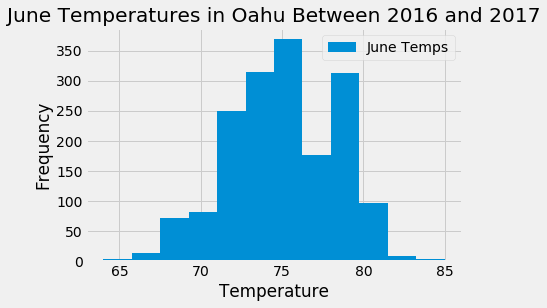

In [74]:
june_df.plot.hist(bins=12)
plt.title("June Temperatures in Oahu Between 2016 and 2017")
plt.xlabel("Temperature")

## D2: Determine the Summary Statistics for December

In [75]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
#Starting from the last data point in the database.
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [76]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.tobs,Measurement.date).filter(extract("month", Measurement.date) == 12)

In [77]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(results, columns=['December Temps','Date'])

# Sort the dataframe by date
december_df.set_index(december_df['Date'], inplace=True)
december_df = december_df.sort_index()

In [78]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 0, 'Temperature')

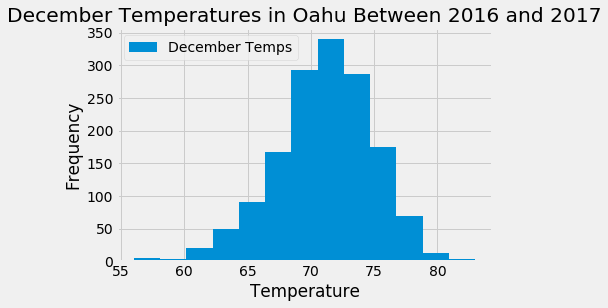

In [80]:
december_df.plot.hist(bins=13)
plt.title("December Temperatures in Oahu Between 2016 and 2017")
plt.xlabel("Temperature")